<a href="https://colab.research.google.com/github/manasamadgul/Pytorch_Fundamentals/blob/main/01_pytorch_workflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.4.0+cu121'

#Step1:Data preparing and Loading

Create a straight line dataset using the linear regression formula (weight * X + bias).
Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
Split the data into 80% training, 20% testing.
Plot the training and testing data so it becomes visual.


In [66]:
weight =0.3
bias =0.9
# CREATE data with 100 data points
start =0
end =1
step =0.02
X_DATA = torch.arange(start,end,step).unsqueeze(dim=1)
Y_DATA = weight*X_DATA+bias

# Create train (80%)/test split (20%)
train_split = int(0.8*len(X_DATA))
x_train, y_train = X_DATA[:train_split], Y_DATA[:train_split] #<- we have training samples for X_train value what is the Y_train value
x_test, y_test = X_DATA[train_split:], Y_DATA[train_split:]#<- we have the test samples for X_test value what is the Y_test value

len(x_train), len(y_train), len(x_test), len(y_test)

#plot the training and testing data
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data=x_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});


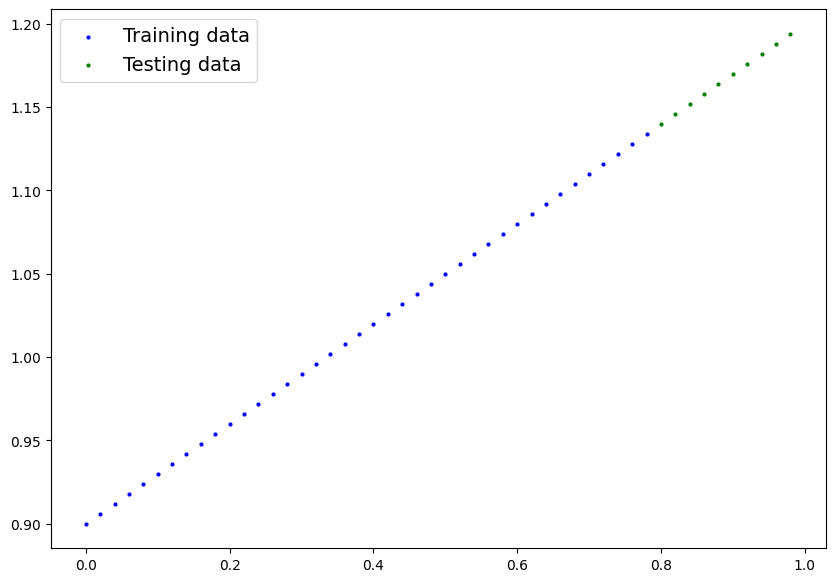

In [54]:
plot_predictions()

#Step2:Build Model

In [67]:
#Now we've got some data, let's build a model to use the blue dots to predict the green dots.
#Build a PyTorch model by subclassing nn.Module.
#Inside should be a randomly initialized nn.Parameter() with requires_grad=True, one for weights and one for bias.
#Implement the forward() method to compute the linear regression function you used to create the dataset above.

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight =nn.Parameter(torch.randn(1,requires_grad= True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad =True, dtype =torch.float))

  def forward(self, X:torch.Tensor)->torch.Tensor:
      return self.weight*X+self.bias



In [68]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [69]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [70]:
##Lets predict by passing x_test to the model_0. It will pass through models forward function and see how closely it predicts y_test# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(x_test)


In [71]:
# Check the predictions
print(f"Number of testing samples: {len(x_test)}")
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


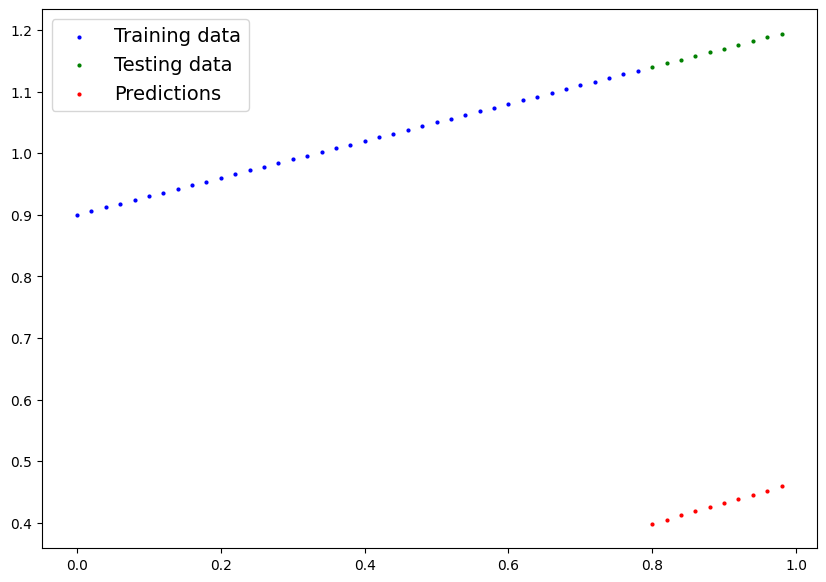

In [72]:
#Plot the predictions and see how close it is to the test data
plot_predictions(predictions=y_preds)

In [10]:
#Now we know that with Random weights and biases in the LinearRegressionModel()
#class the preditions are poor. We need to set the loss and Optimizer to know the
#loss value and optimize the predictions closer to the
#actual value (weight=0.3 and bias =0.9)
#Through Gradient Descent and Backpropogation loss should get minimized which means
#the predictions are getting closer to the actual value

In [73]:
#Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01)

In [74]:
# in the below code we are looping once to reduce the loss through gradient descent and back propogation
torch.manual_seed(42)
epochs =300
#Tracking values
train_loss_values = []
test_loss_values = []
epoch_count = []
#Training the model
for epoch in range(epochs):
  model_0.train()
  #step1: Forward Pass
  y_pred = model_0(x_train) #passing the training data to the model and it predicts
  #STep2. Calculate the loss
  loss = loss_fn(y_pred,y_train) # with the predicted data we are calculating the loss
  #Step3.optimizer zero grad
  optimizer.zero_grad()
  #step4. perform back propogation
  loss.backward()
  #Step5. step the optimizer(perform gradeint descent)
  optimizer.step()
  #Testing the model
  model_0.eval() #model is evaluated
  #Lets write the testing loop. Lets now show the test data which is x_test and let the model predict something closer to y_test(like predictions)
  with torch.inference_mode():
    test_pred = model_0(x_test)#passing the test data in the testing loop.
    test_loss = loss_fn(test_pred,y_test) #how far are we from the actual value(which is y_test)
    if(epoch%20 ==0):
      train_loss_values.append(loss)
      test_loss_values.append(test_loss)
      epoch_count.append(epoch)
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      print(model_0.state_dict())


Epoch: 0 | Loss: 0.7568813562393188 | Test Loss: 0.7250651121139526
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 20 | Loss: 0.5264613628387451 | Test Loss: 0.4556453227996826
OrderedDict([('weight', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch: 40 | Loss: 0.2960416078567505 | Test Loss: 0.18622562289237976
OrderedDict([('weight', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch: 60 | Loss: 0.07731032371520996 | Test Loss: 0.06994309276342392
OrderedDict([('weight', tensor([0.5687])), ('bias', tensor([0.7308]))])
Epoch: 80 | Loss: 0.0521300844848156 | Test Loss: 0.11544597148895264
OrderedDict([('weight', tensor([0.5552])), ('bias', tensor([0.7883]))])
Epoch: 100 | Loss: 0.04509609192609787 | Test Loss: 0.1043960452079773
OrderedDict([('weight', tensor([0.5226])), ('bias', tensor([0.8063]))])
Epoch: 120 | Loss: 0.038231261074543 | Test Loss: 0.08853815495967865
OrderedDict([('weight', tensor([0.4885])), ('bias', tensor([0.8208]))])
Epoch: 

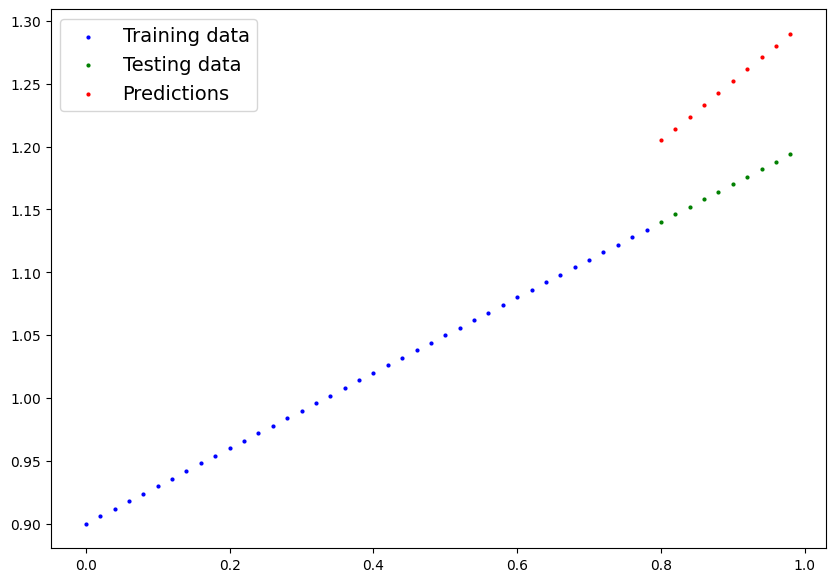

In [52]:
#Lets see how our new predictions are after running epoch couple of times
#with torch.inference_mode():
 # y_preds_new = model_0(x_test)
 # plot_predictions(predictions = y_preds_new)

#by training longer (300 epoch) we can see that the loss is getting almost near to 0 and weights are biases are coming near to the green dots which are the original test data.

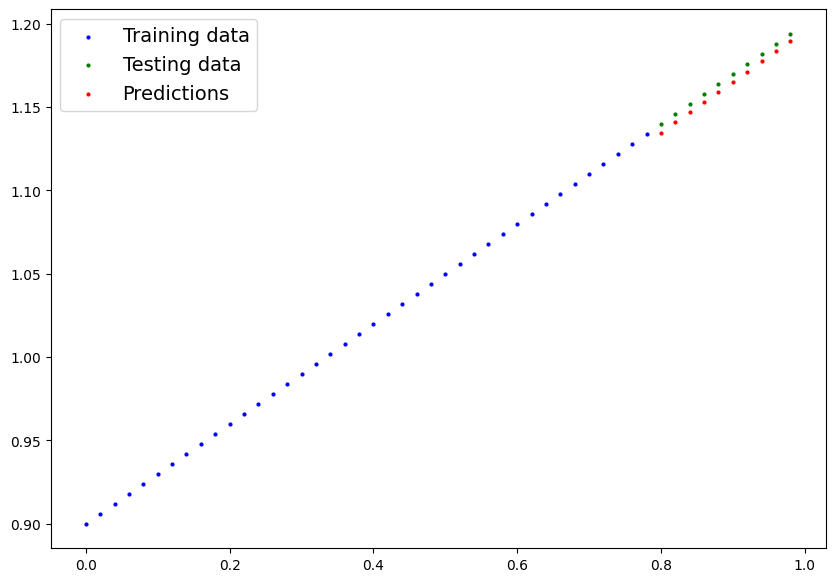

In [75]:
plot_predictions(predictions=test_pred)